## Qusetion 1

(a). Please fill in the missing code to train 3 different MLPs. And then compare their accuracy values by plotting a bar chart.

In [324]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cpu')

batch_size = 64

train_transform = transforms.Compose([ transforms.ToTensor()])

test_transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=train_transform)

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=test_transform)

## construct the loader for training
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size,
                                         shuffle=False)



class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        ## forward x to sigmoid activation function.
        x = torch.sigmoid(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        m = nn.Softmax()
        x = m(x)
        
        return x

    
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        ## forward x to relu activation function.
        x = F.relu(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        x = F.softmax(x)
        
        return x    

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 16)
        self.fc2 = nn.Linear(16, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        ## forward x to relu activation function.
        x = F.relu(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        x = F.softmax(x)
        
        return x   
    
def train(epoch, log_interval=200):
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        ## zero gradient buffers
        optimizer.zero_grad()
        
        ## pass data through the network
        output = model(data)

        ## calculate loss
        loss = criterion(output, target)

        ## backpropagate
        loss.backward()
        
        ## update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        
        pred = output.data.max(1)[1]
        
        correct += pred.eq(target.data).sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))

## Trainig and evaluating 1) MLP
model = Net1().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

    
## Trainig and evaluating 2) MLP
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

## Trainig and evaluating 3) MLP
model = Net3().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

<ipython-input-324-fd8ed88fe452>:58: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = m(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.304981
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.301955
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.296881
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.297209
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.290030

Validation set: Average loss: 2.2941, Accuracy: 1135/10000 (11.35%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.293878
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.302991
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.292756
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.270677
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.300769

Validation set: Average loss: 2.2703, Accuracy: 2044/10000 (20.44%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.279945
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.247510
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.246030
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.215213
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.214111

Validation set: Average loss: 2.2146, Accuracy: 2252/10000 (22.52%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.170541
Train Epoc

<ipython-input-324-fd8ed88fe452>:83: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.294462
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.281948
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.233108
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.232159

Validation set: Average loss: 2.1605, Accuracy: 5249/10000 (52.49%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.152149
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.036529
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.983967
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.896583
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.895409

Validation set: Average loss: 1.8067, Accuracy: 7839/10000 (78.39%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.705642
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.750786
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.718154
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.730124
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.783513

Validation set: Average loss: 1.7007, Accuracy: 8178/10000 (81.78%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.704236
Train Epoch: 4 [12800/60000 (21%)]	Loss: 1.688158
Train

<ipython-input-324-fd8ed88fe452>:107: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.297590
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.286959
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.260871
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.235079

Validation set: Average loss: 2.1904, Accuracy: 4796/10000 (47.96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.235173
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.082625
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.998516
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.991316
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.939898


KeyboardInterrupt: 

(b). Please change the batch size and learning rate to train (2) MLP (Net2）as above. And then compare their accuracy values by plotting a matrix with values and colormap. Please note that each time you change the setting and train the MLP, you need to initialize the model again (e.g. "model = Net2().to(device)"). 

In [57]:
## Trainig and evaluating 2) MLP with the first setting
batch_size = 64
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[0, 0] = accv[-1]

## Trainig and evaluating 2) MLP with the second setting
batch_size = 128
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[1, 0] = accv[-1]
    
## Trainig and evaluating 2) MLP with the third setting
batch_size = 64
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[0, 1] = accv[-1]

## Trainig and evaluating 2) MLP with the fourth setting
batch_size = 128
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[1, 1] = accv[-1]


## Trainig and evaluating 2) MLP with the fifth setting
batch_size = 64
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[0, 2] = accv[-1]


## Trainig and evaluating 2) MLP with the sixth setting
batch_size = 128
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.5)
criterion = nn.CrossEntropyLoss()
epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)
accuracy_matrix[1, 2] = accv[-1]



Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302820


<ipython-input-56-5671d7163faf>:85: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.298860
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.294057
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.289768
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.287861

Validation set: Average loss: 2.2736, Accuracy: 3793/10000 (37.93%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.273050
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.242797
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.217850
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.216009
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.204115

Validation set: Average loss: 2.1667, Accuracy: 4577/10000 (45.77%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.169247
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.124745
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.095454
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.070521
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.070521

Validation set: Average loss: 1.9693, Accuracy: 5698/10000 (56.98%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.951683
Train Epoch: 4 [12800/60000 (21%)]	Loss: 2.006759
Train

Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.729365
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.681624
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.700889

Validation set: Average loss: 1.6720, Accuracy: 8279/10000 (82.79%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.665691
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.722733
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.704407
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.649947
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.627935

Validation set: Average loss: 1.6464, Accuracy: 8379/10000 (83.79%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.652061
Train Epoch: 4 [12800/60000 (21%)]	Loss: 1.661813
Train Epoch: 4 [25600/60000 (43%)]	Loss: 1.698032
Train Epoch: 4 [38400/60000 (64%)]	Loss: 1.668378
Train Epoch: 4 [51200/60000 (85%)]	Loss: 1.702370

Validation set: Average loss: 1.6353, Accuracy: 8416/10000 (84.16%)

Train Epoch: 5 [0/60000 (0%)]	Loss: 1.617200
Train Epoch: 5 [12800/60000 (21%)]	Loss: 1.754087
Train Epoch: 5 [25600/60000 (43%)]	Loss: 1.627303
Train

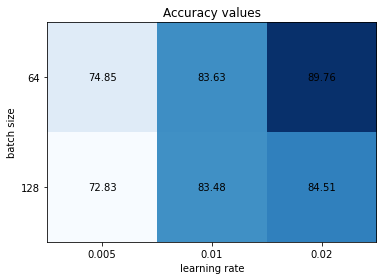

In [58]:
batch_set = [64,128]
learning_rate_set = [0.005, 0.01, 0.02]
fig, ax = plt.subplots()
ax.imshow(accuracy_matrix, cmap=plt.cm.Blues)
for i in range(2):
    for j in range(3):
        c = round( accuracy_matrix[i,j], 2)
        ax.text(j,i , str(c), va='center', ha='center')
        
ax.set_xticks(np.arange(len(learning_rate_set)))
ax.set_yticks(np.arange(len(batch_set)))
ax.set_xticklabels(learning_rate_set)
ax.set_yticklabels(batch_set)
ax.set_xlabel("learning rate")
ax.set_ylabel("batch size")
ax.set_title("Accuracy values")
fig.tight_layout()
plt.show()

## Question 2

Please use “dropout”, “batch normalization” and any “data augmentation” to train to improve the accuracy of (2) MLP (Net2）in Question 1 a. (Batch size is 64 and learning rate is 0.01). Please describe clearly your design choices.

In [263]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cpu')

batch_size = 64

train_transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)])

test_transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize(0.5,0.5)])


print("Number of training images - ", len(train_dataset.data))
print("Size of images - ", train_dataset.data[0].shape)


train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=train_transform)


# print( train_dataset.__getitem__(1) )
validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=test_transform)

## construct the loader for training
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size,
                                         shuffle=False)

Number of training images -  60000
Size of images -  torch.Size([28, 28])


In [ ]:
for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        m = nn.Dropout(p=0.25)
        data = m(data)

        
        m = nn.UpsamplingNearest2d(scale_factor=2)
        data = m(data)
        
        print(data.shape)
        


torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 5

torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 5

torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 56, 56])
torch.Size([64, 1, 5

In [ ]:


# class Net2(nn.Module):
#     def __init__(self):
#         super(Net2, self).__init__()
        
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
#         self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
#         x = torch.randn(28,28).view(-1,1,28,28)
#         self._to_linear = None
#         self.convs(x)
#         self.fc1 = nn.Linear(self._to_linear, 128)
#         self.fc2 = nn.Linear(128, 10)
#     def convs(self, x):
#         # Conv - DropOut - BatchNorm - Activation - Pool 
        
#         # 1st Conv 
#         x = self.conv1(x)
        
#         # dropout
#         m = nn.Dropout(p=0.25)
#         x = m(x)
        
#         #batch norm
#         m2 = nn.BatchNorm2d(32, affine=False)
#         x = m2(x)
        
#         #activation
#         x = F.relu(x)
        
#         #2nd conv
#         x = self.conv2(x)
        
#         #activation
#         x = F.relu(x)
        
#         # batch norm
#         m2 = nn.BatchNorm2d(64, affine=False)
#         x = m2(x)
        
#         #pooling
#         x = self.pool(x)
        
#         #dropout
#         m = nn.Dropout(p=0.25)
#         x = m(x)
        
#         if self._to_linear is None:
#             self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
#         return x

#     def forward(self, x):

#         x = self.convs(x)

#         x = x.view(-1, self._to_linear )
        
#         ## forward x to the first fully connected layer.
#         x = self.fc1(x)
        
#         ## forward x to relu activation function.
#         x = F.relu(x)
        
#         ## forward x to the second fully connected layer.
#         x = self.fc2(x)
        
#         ## forward x to softmax activation function.
#         x = F.softmax(x, dim=1)
        
#         return x    

# net = Net2()
# print(net)
    



In [331]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
               
        self.fc1 = nn.Linear(28*28*49, 128)
        self.fc2 = nn.Linear(128, 10)
   
      
    def forward(self, x):
   
        
        m = nn.UpsamplingNearest2d(scale_factor=7)
        x = m(x)
        
        
        # dropout
        m = nn.Dropout(p=0.25)
        x = m(x)
        
       
        #batch norm
        m2 = nn.BatchNorm2d(1, affine=False)
        x = m2(x)
        
        
        x = x.view(-1, x[0].shape[0]*x[0].shape[1]*x[0].shape[2] )
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)
        
        
        ## forward x to relu activation function.
        x = F.relu(x)


        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        x = F.softmax(x, dim=1)
        
        return x    

net = Net2()
print(net)

Net2(
  (fc1): Linear(in_features=38416, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
def train(epoch, log_interval=200):
    model.train()
    
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        ## zero gradient buffers
        optimizer.zero_grad()
        
        ## pass data through the network
        output = model(data)
        
        
        pred = output.data.max(1)[1]

        ## calculate loss
        loss = criterion(output, target)

        ## backpropagate
        loss.backward()
        
        ## update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))
        
        
        
def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    
    pred_all = []
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        
        pred = output.data.max(1)[1]
        
        pred_all.extend(pred)
        
        correct += pred.eq(target.data).sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))
    
    
    pred_all = np.array(pred_all)

    return pred_all

    
## Trainig and evaluating 2) MLP
model = Net2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.02, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 20
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    pred_all = validate(lossv,accv)

np.save('results.npy',pred_all)


print(np.shape(pred_all))
#     validate(lossv, accv)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.302084
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.539234
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.528965
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.577664
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.553203

Validation set: Average loss: 1.5273, Accuracy: 9403/10000 (94.03%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.538511
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.549514
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.553532
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.525028
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.498407

Validation set: Average loss: 1.5087, Accuracy: 9566/10000 (95.66%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.528729
Train Epoch: 3 [12800/60000 (21%)]	Loss: 1.479157
Train Epoch: 3 [25600/60000 (43%)]	Loss: 1.520704
Train Epoch: 3 [38400/60000 (64%)]	Loss: 1.528379
Train Epoch: 3 [51200/60000 (85%)]	Loss: 1.492247

Validation set: Average loss: 1.5020, Accuracy: 9620/10000 (96.20%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 1.525223
Train Epoc

## Question 3

Please complete the missing code to use RBM to initialize the parameters of the (1) MLP (Net1) in Question 1 a. Compare the accuracy values with and without RBM pretraining by plotting a bar chart.

In [328]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cpu')

batch_size = 64

train_transform = transforms.Compose([ transforms.ToTensor(),
                                    ])

test_transform = transforms.Compose([transforms.ToTensor(),
                                    ])

train_dataset = datasets.MNIST('./data', 
                               train=True, 
                               download=True, 
                               transform=train_transform)

validation_dataset = datasets.MNIST('./data', 
                                    train=False, 
                                    transform=test_transform)

## construct the loader for training
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

## construct the loader for validation
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size,
                                         shuffle=False)

class RBM():

    def __init__(self, num_visible, num_hidden, k, learning_rate=0.1):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        self.k = k
        self.learning_rate = learning_rate

        self.weights = torch.randn(num_visible, num_hidden) * 0.01
        self.visible_bias = torch.ones(num_visible) * 0.01
        self.hidden_bias = torch.zeros(num_hidden)
        
    def _sigmoid(self, x):
        return 1 / (1 + torch.exp(-x))

    def _random_probabilities(self, num):
        random_probabilities = torch.rand(num)
        return random_probabilities
    
## compute the probability of hidden nodes given visible nodes.
    def compute_hidden(self, visible_probabilities):
        
        hidden_activations = torch.matmul(visible_probabilities, self.weights) + self.hidden_bias
        
        hidden_probabilities = self._sigmoid(hidden_activations)
        return hidden_probabilities

## compute the probability of visible nodes given hidden nodes.
    def compute_visible(self, hidden_probabilities):
        
        visible_activations = torch.matmul(hidden_probabilities, self.weights.t()) + self.visible_bias
        
        visible_probabilities = self._sigmoid(visible_activations)
        return visible_probabilities
    
## Contrastive Divergence (CD-k)
    def contrastive_divergence(self, input_data):
        
        positive_hidden_probabilities = self.compute_hidden(input_data)
        
        ## sample a hidden activation vector from its probability distribution
        positive_hidden_activations = (positive_hidden_probabilities >= self._random_probabilities(self.num_hidden)).float()
        
        
        ## compute the positive gradient
        positive_associations = torch.matmul(input_data.t(), positive_hidden_activations)


        hidden_activations = positive_hidden_activations

        for step in range(self.k):
            visible_probabilities = self.compute_visible(hidden_activations)
            hidden_probabilities = self.compute_hidden(visible_probabilities)
            
            ## resample a hidden activation vector from its probability distribution
            hidden_activations = (hidden_probabilities >= self._random_probabilities(self.num_hidden)).float()


        negative_visible_probabilities = visible_probabilities
        negative_hidden_probabilities = hidden_probabilities
        
        ## compute the nagetive gradient
        negative_associations = torch.matmul(negative_visible_probabilities.t(), negative_hidden_probabilities)

        
        batch_size = input_data.size(0)
        
        ## update weights
        self.weights = (positive_associations - negative_associations) * self.learning_rate / batch_size
        
        ## update bias of visible units
        self.visible_bias = torch.sum(input_data - negative_visible_probabilities, dim=0) * self.learning_rate / batch_size

        ## update bias of hidden units
        self.hidden_bias = torch.sum(positive_hidden_probabilities - negative_hidden_probabilities, dim=0) * self.learning_rate / batch_size

        ## compute reconstruction error
        error = torch.mean((input_data - negative_visible_probabilities)**2)

        return error

BATCH_SIZE = 64
VISIBLE_UNITS = 784  # 28 x 28 images
HIDDEN_UNITS = 128
CD_K = 3
EPOCHS = 5

########## TRAINING RBM ##########
print('Training RBM...')

rbm = RBM(VISIBLE_UNITS, HIDDEN_UNITS, CD_K)

for epoch in range(EPOCHS):
    epoch_error = 0.0
    num_batch = 0
    for batch, _ in train_loader:
        batch = batch.view(len(batch), VISIBLE_UNITS)  # flatten input data

        batch_error = rbm.contrastive_divergence(batch)
        epoch_error += batch_error
        num_batch = num_batch + 1

    print('Epoch Error (epoch=%d): %.4f' % (epoch, epoch_error/num_batch))

Training RBM...
Epoch Error (epoch=0): 0.2416
Epoch Error (epoch=1): 0.2415
Epoch Error (epoch=2): 0.2414
Epoch Error (epoch=3): 0.2415
Epoch Error (epoch=4): 0.2413


We now check whether the trained RBM model can extract features from the images.

We calculate the probability of hidden nodes given input MNIST data as features and use a SciPy-based logistic regression for classification.

In [329]:
from sklearn.linear_model import LogisticRegression

print('Extracting features...')

train_features = np.zeros((len(train_dataset), HIDDEN_UNITS))
train_labels = np.zeros(len(train_dataset))
test_features = np.zeros((len(validation_dataset), HIDDEN_UNITS))
test_labels = np.zeros(len(validation_dataset))

for i, (batch, labels) in enumerate(train_loader):
    batch = batch.view(len(batch), VISIBLE_UNITS)  # flatten input data
    try:
        train_features[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = rbm.compute_hidden(batch).numpy()
        train_labels[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = labels.numpy()
    except:
        size = len(train_dataset) - i*BATCH_SIZE
        train_features[i*BATCH_SIZE:len(train_dataset)] = rbm.compute_hidden(batch).numpy()[0:size]
        train_labels[i*BATCH_SIZE:len(train_dataset)] = labels.numpy()[0:size]        

for i, (batch, labels) in enumerate(validation_loader):
    batch = batch.view(len(batch), VISIBLE_UNITS)  # flatten input data
    try:
        test_features[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = rbm.compute_hidden(batch).numpy()
        test_labels[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = labels.numpy()
    except:
        size = len(test_dataset) - i*BATCH_SIZE
        test_features[i*BATCH_SIZE:len(test_dataset)] = rbm.compute_hidden(batch).numpy()[0:size]
        test_labels[i*BATCH_SIZE:len(test_dataset)] = labels.numpy()[0:size]  


########## CLASSIFICATION ##########
print('Classifying...')

clf = LogisticRegression()
clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)

print('Classification Accuracy: %d/%d' % (sum(predictions == test_labels), test_labels.shape[0]))

Extracting features...
Classifying...
Classification Accuracy: 3612/10000


/Users/kangyetian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [330]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        ## initialize the paramaters with the weights and hidden_bias in trained RBM.
        self.fc1.weight = nn.Parameter(torch.transpose(rbm.weights,1,0))
        self.fc1.bias = nn.Parameter(rbm.hidden_bias)
        
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        ## forward x to the first fully connected layer.
        x = self.fc1(x)

        ## forward x to sigmoid activation function.
        x = torch.sigmoid(x)
        
        ## forward x to the second fully connected layer.
        x = self.fc2(x)
        
        ## forward x to softmax activation function.
        m = nn.Softmax()
        x = m(x)
        
        return x     
    
def train(epoch, log_interval=200):
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)

        ## zero gradient buffers
        optimizer.zero_grad()
        
        ## pass data through the network
        output = model(data)

        ## calculate loss
        loss = criterion(output, target)
        
        

        ## backpropagate
        loss.backward()
        
        ## update weights
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

def validate(loss_vector, accuracy_vector):
    model.eval()
    val_loss, correct = 0, 0
    for data, target in validation_loader:
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        val_loss += criterion(output, target).data.item()
        
        pred = output.data.max(1)[1]
        
        correct += pred.eq(target.data).sum()

    val_loss /= len(validation_loader)
    loss_vector.append(val_loss)

    accuracy = 100. * correct.to(torch.float32) / len(validation_loader.dataset)
    accuracy_vector.append(accuracy)
    
    print('\nValidation set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        val_loss, correct, len(validation_loader.dataset), accuracy))
    
## Trainig and evaluating 1) MLP
model = Net1().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

## define the crosstntropy loss.
criterion = nn.CrossEntropyLoss()

epochs = 5
lossv, accv = [], []
for epoch in range(1, epochs + 1):
    train(epoch)
    validate(lossv, accv)

<ipython-input-330-1692ac3ff58b>:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = m(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303712
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.304038
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.298996
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.295989
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.294553

Validation set: Average loss: 2.2968, Accuracy: 1135/10000 (11.35%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.305507
Train Epoch: 2 [12800/60000 (21%)]	Loss: 2.280331
Train Epoch: 2 [25600/60000 (43%)]	Loss: 2.307274
Train Epoch: 2 [38400/60000 (64%)]	Loss: 2.277110
Train Epoch: 2 [51200/60000 (85%)]	Loss: 2.286410

Validation set: Average loss: 2.2849, Accuracy: 1348/10000 (13.48%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 2.298855
Train Epoch: 3 [12800/60000 (21%)]	Loss: 2.262119
Train Epoch: 3 [25600/60000 (43%)]	Loss: 2.268011
Train Epoch: 3 [38400/60000 (64%)]	Loss: 2.249558
Train Epoch: 3 [51200/60000 (85%)]	Loss: 2.275086

Validation set: Average loss: 2.2423, Accuracy: 2105/10000 (21.05%)

Train Epoch: 4 [0/60000 (0%)]	Loss: 2.234939
Train Epoc